![](title.png)

## THE PROJECT
##### *Acquadro Patrizio - Bachelor in AI - Machine Learning, Artificial Neural Networks, Deep Learning*

In this DeepNote file is presented *Machine Learning project*.

The dataset, on which the algorithm is trained, was chosen on the *Kaggle* website and can be found at the following link https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction.

It describes the data of the employees in a company.
We want to predict whether these employees will leave the company or not in the next 2 years. 

**The dataset:** 
- is composed by *9 features* (columns), in which 4 are categorical and the others are numerical and *4653 instances* (rows), which correspond to the employees
- doesn't contain *missing values*
- contain the target of the task, the feature *LeaveOrNot*, revealing whether the employee will leave the company or not

## INITIATION

### Importing

At the beginning of the project we import all the **libraries** and the different related *modules, classes and functions*.

In [ ]:
import sklearn                     # Import the scikit-learn machine learning library
import pandas as pd                # Import the pandas data manipulation library and alias it as pd
import numpy as np                 # Import the numpy numerical computation library and alias it as np
import itertools                   # Import the itertools module, which provides functions for working with iterable objects
import imblearn                    # Import the imbalanced-learn library, which provides techniques to handle imbalanced datasets
import seaborn as sns              # Import the seaborn data visualization library and alias it as sns

from sklearn.pipeline import Pipeline                       # Import the Pipeline class from scikit-learn
from sklearn.compose import ColumnTransformer               # Import the ColumnTransformer class from scikit-learn
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score, roc_curve, precision_recall_curve, confusion_matrix) # Import various metrics from scikit-learn
from sklearn.model_selection import (learning_curve, validation_curve, train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold) # Import various functions and classes for model selection from scikit-learn
from sklearn.linear_model import (Perceptron, LogisticRegression)    # Import specific linear models from scikit-learn
from sklearn.neighbors import KNeighborsClassifier         # Import the KNeighborsClassifier class from scikit-learn
from sklearn.decomposition import PCA                       # Import the PCA class from scikit-learn for performing principal component analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # Import the LDA class from scikit-learn for performing linear discriminant analysis
from sklearn.impute import SimpleImputer, KNNImputer        # Import the SimpleImputer and KNNImputer classes from scikit-learn for imputing missing values
from sklearn.preprocessing import (FunctionTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder) # Import various transformers for preprocessing data from scikit-learn
from sklearn.datasets import fetch_openml                  # Import the fetch_openml function from scikit-learn to load datasets
from sklearn.ensemble import (VotingClassifier, BaggingClassifier, RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier) # Import various ensemble methods from scikit-learn
from sklearn.tree import (DecisionTreeClassifier, DecisionTreeRegressor) # Import specific decision tree models from scikit-learn

from xgboost import (XGBClassifier, XGBRFClassifier)         # Import the XGBoost classifiers from the xgboost library

from scipy.stats import loguniform, uniform           # Import various probability distributions from scipy.stats

from mlxtend.feature_selection import SequentialFeatureSelector as SFS # Import the SequentialFeatureSelector class from the mlxtend library

from imblearn.over_sampling import (SMOTE, RandomOverSampler) # Import specific oversampling techniques from imbalanced-learn
from imblearn.under_sampling import (RandomUnderSampler, TomekLinks) # Import specific undersampling techniques from imbalanced-learn
from imblearn.pipeline import Pipeline as IMBPipeline       # Import the Pipeline class from imbalanced-learn

import missingno as msno           # Import the missingno library for visualizing missing data
import matplotlib.pyplot as plt    # Import the pyplot module from the matplotlib library for visualizing data
import warnings                    # Import the warnings module to suppress warnings in the output

warnings.filterwarnings('ignore')

### Versions

We *print* now the **versions** of sklearn, panda, numpy and imblearn, that we currently use.

In [ ]:
print(sklearn.__version__, pd.__version__, np.__version__, imblearn.__version__)

1.1.2 1.2.5 1.23.4 0.10.1


### Visualizing the dataframe

We import the **csv dataset file**, called *Empolyees_Dataframe.csv*, using the pandas method read_csv
The dataset will be called *dataframe* (we have also dataframeP, which will be the dataset with the target column, so not removed)

In [ ]:
dataframeP = pd.read_csv('Employees_Dataframe.csv') #Read the data from a CSV file
dataframe = pd.read_csv('Employees_Dataframe.csv')

#To visualize it:
dataframe

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


We print the dimension of it, to see the number of columns and rows

In [ ]:
print(f'Features: {dataframe.shape[1]}\nElements: {dataframe.shape[0]}')

Features: 9
Elements: 4653


### Removing the target column

We **remove** the column *LeaveOrNot* from our dataset and we **save it** into the *variable y*
This is done because we will use it to train the algorythm.

Then we visualize the dataset without the target feature

In [ ]:
y=dataframe.pop("LeaveOrNot") #Since it's a feature of integer boolean values, I don't have to use any mapping

dataframe

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,Bachelors,2017,Bangalore,3,34,Male,No,0
1,Bachelors,2013,Pune,1,28,Female,No,3
2,Bachelors,2014,New Delhi,3,38,Female,No,2
3,Masters,2016,Bangalore,3,27,Male,No,5
4,Masters,2017,Pune,3,24,Male,Yes,2
...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4
4649,Masters,2013,Pune,2,37,Male,No,2
4650,Masters,2018,New Delhi,3,27,Male,No,5
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2


## INSERT MISSING DATA
Since our dataset don't have any missing data, we use a special code to insert them, in order to show then how to handle missing data.
So we import Nan values in some random rows of the dataframe for some specific columns, using numpy.

In particular here I decided to make this on the **columns** *Age, City, JoiningYear* and convert the **10%** of the rows with missing data. 
We use *replace=False* in order to guarantee that the missing values are inserted into unique instances, so different any time. This because otherwise it may happens that missing values are inserted multiple times in the same row. 

Then we store the dataframe with the missing values in a variable called X, that we print to visualize it.

In [ ]:
size=4653 #define the variable size equals to number of rows

#we set the values of the 465 rows, for the specified columns, equal to nan in order to insert missing values
dataframe.loc[np.random.choice(size,465,replace=False),'Age'] = np.nan
dataframe.loc[np.random.choice(size,465,replace=False),'City'] = np.nan
dataframe.loc[np.random.choice(size,465,replace=False),'JoiningYear'] = np.nan

X=dataframe #we create the dataframe with now missing values

X #we print it to visualize it

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,Bachelors,2017.0,Bangalore,3,34.0,Male,No,0
1,Bachelors,2013.0,Pune,1,28.0,Female,No,3
2,Bachelors,2014.0,New Delhi,3,38.0,Female,No,2
3,Masters,2016.0,Bangalore,3,27.0,Male,No,5
4,Masters,2017.0,Pune,3,24.0,Male,Yes,2
...,...,...,...,...,...,...,...,...
4648,Bachelors,2013.0,Bangalore,3,26.0,Female,No,4
4649,Masters,2013.0,Pune,2,37.0,Male,No,2
4650,Masters,2018.0,New Delhi,3,27.0,Male,No,5
4651,Bachelors,2012.0,Bangalore,3,30.0,Male,Yes,2


## VISUALIZE MISSING DATA
In this section will be shown different methods to visualize the dataset, and especially the missing data in it, in order to show then how to handle them.
- **info:** to get the number of non-missing values in each column and the type of them.
- **describe:** to get a statistic description of the dataframe, for each column type (numerical-categorical)
- **isnull().sum(axis=0):** to obtain the total number of missing data for each column in the dataframe
- **X.isnull().sum(axis=0)/X.shape[0]:** to obtain the percentage of missing data for each column in the dataframe
- **msno.matrix(X):** is the graphical representation of the missing values in each column, so the distribution of the missing data in the dataframe



### Info

The **info()** method is used to print a concise *summary of a pandas DataFrame*. 
It provides information about the column data types, the columns name and number, the memory usage and the number of non-null values. 
So the info() method is useful to *check* if there are any *missing values* or NaN values in the dataset.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  4653 non-null   object 
 1   JoiningYear                4188 non-null   float64
 2   City                       4188 non-null   object 
 3   PaymentTier                4653 non-null   int64  
 4   Age                        4188 non-null   float64
 5   Gender                     4653 non-null   object 
 6   EverBenched                4653 non-null   object 
 7   ExperienceInCurrentDomain  4653 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 290.9+ KB


### Describe

The **describe()** method generates a *descriptive statistics* of a DataFrame.
Provides a summary of the statistics of *numerical columns*, including count, mean, standard deviation, minimum, maximum, and quartile values. 
For the *non-numeric columns*, describe() will include summary statistics of these columns as well. 
So the output of describe() provides an overview of the distribution of values for each column, which can be helpful to identify missing values.

The **include** parameter is used to control which data types include for the summary statistics.

In [ ]:
X.describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
count,4653,4188.000000,4188,4653.000000,4188.000000,4653,4653,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN
freq,3601,NaN,1989,NaN,NaN,2778,4175,NaN
mean,NaN,2015.057307,NaN,2.698259,29.378940,NaN,NaN,2.905652
std,NaN,1.868130,NaN,0.561435,4.832905,NaN,NaN,1.558240
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000


### Value counts

For **categorical datas** we can also use *different methods* to get useful informations.
An example is **value_counts()**, which returns the *frequency* of each category in a column

In [ ]:
X['Education'].value_counts() #frequency of the instances of each category in the feature Education

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [ ]:
X['City'].value_counts() #frequency of the instances of each category in the feature City

Bangalore    1989
Pune         1154
New Delhi    1045
Name: City, dtype: int64

### Sum of missing values

Another useful method to recognize missing values is **isnull()** with the **parameter sum**.
With this method we get the number of missing values in each column of the dataframe.

The **axis** parameter is used to specify if we want to make the sum of values with respect to *columns(0) or rows(1)*

In [ ]:
X.isnull().sum(axis=0)

Education                      0
JoiningYear                  465
City                         465
PaymentTier                    0
Age                          465
Gender                         0
EverBenched                    0
ExperienceInCurrentDomain      0
dtype: int64

### Percentages of missing values

In addition to the code in the previous block we can use the parameter **X.shape**.
This paramter returns the *percentages of non-missing values* in each feature, if we specify inside the square brackets *0*.
If we specify *1* instead the output is the percentages of missing values in a row.

In [ ]:
X.isnull().sum(axis=0)/X.shape[0]

Education                    0.000000
JoiningYear                  0.099936
City                         0.099936
PaymentTier                  0.000000
Age                          0.099936
Gender                       0.000000
EverBenched                  0.000000
ExperienceInCurrentDomain    0.000000
dtype: float64

### Visualizing missing data

**msno.matrix(X)** is a method from the missingno library, used to *visualize the missing data* in a DataFrame X.

The method creates a *matrix plot*: the columns are represented on the x-axis while the rows on the y-axis. 
Each cell represents a row in the DataFrame, with missing values being represented as white cells. The white patterns in the matrix thus indicate the locations of missing data in the DataFrame.

So with this method we quickly identify patterns and areas of missing data in a DataFrame.

<AxesSubplot: >

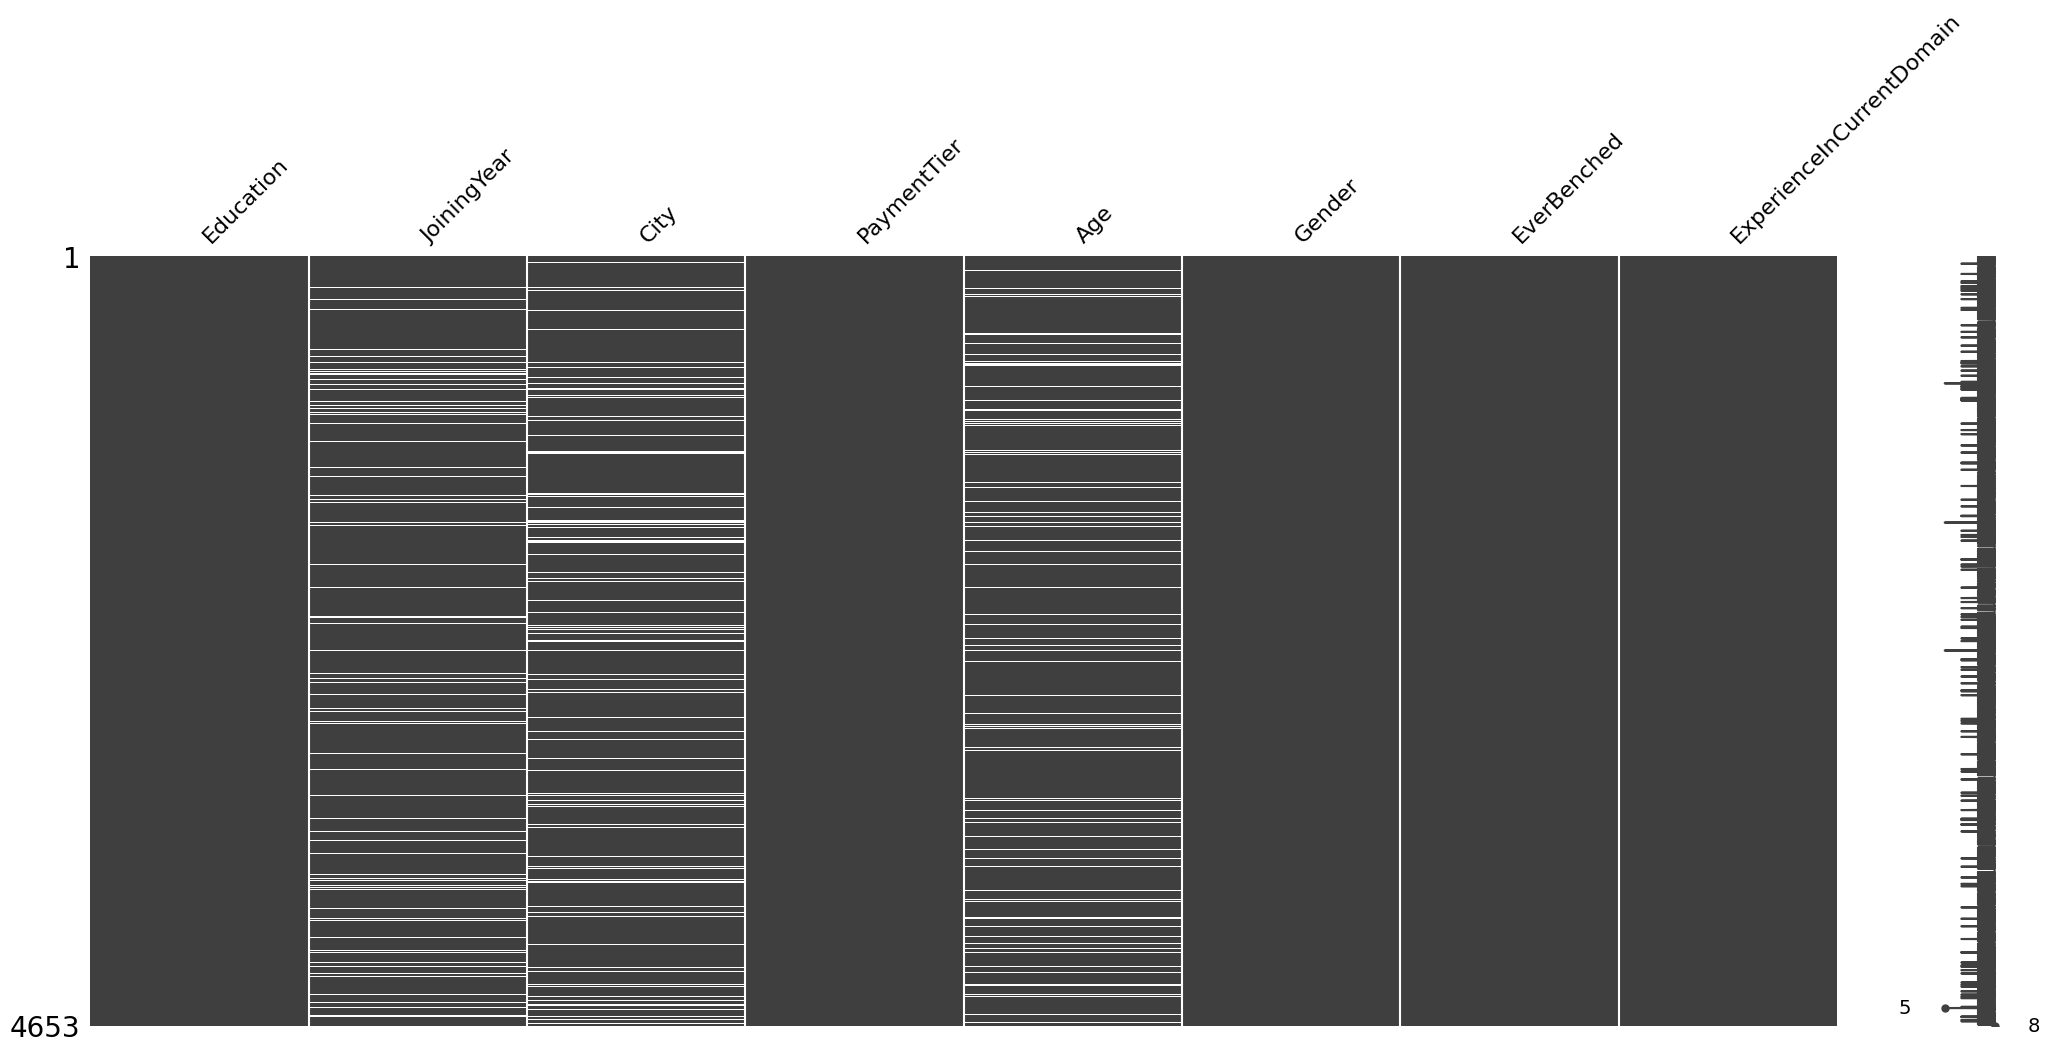

In [ ]:
msno.matrix(X)

## HANDLING MISSING DATA
In this section, since now that we know how the missing data are distributed and their amount, we can **handle them** in order to get a *dataframe with no missing data*, that we can train to generalize unseen data.

We have **2 different ways** to deal with missing data:
1) *Removing* the entire row or column with missing values, but is very drastic and make the dataset less performant, so we avoid this way when we have few missing data
2) *Fill* the missing values with some statistical methods, that I explain below.

Since in our dataset we don't have many missing values in each column(only 10%), we can use the second method.

### Pipelines

Pipelines are an effective way to *automate the entire process of handling missing data.* 
A pipeline consists of a **series of steps** that are defined in a specific order. 

In the case of missing data, a pipeline would typically consist of the following steps:
1. *Imputation:* In this step, missing values are replaced with some other value, such as the mean, median, or mode of the non-missing values. This step can be performed using different imputation technique.
2. *Data transformation:* In this step, the data is transformed into a format that can be used for modeling. This could involve transforming categorical data into numerical and scaling numerical features.

> Age and JoiningYear features

We first visualize the approximate distribution of the 2 numerical features with missing values, with also the mean, the minimum and the maximum values.

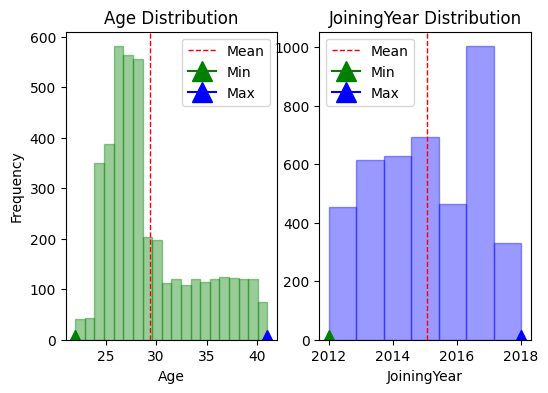

In [ ]:
age = X["Age"]
age = age.dropna()

mean_age = np.mean(age)
min_value_age = np.min(age)
max_value_age = np.max(age)

jy = X["JoiningYear"]
jy = jy.dropna()

mean_jy = np.mean(jy)
min_value_jy = np.min(jy)
max_value_jy = np.max(jy)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))

# Creare il histogram
ax1.hist(age, bins=20, color='green', alpha=0.4, edgecolor='green')

# Overlay la media, il massimo e il minimo come punti
ax1.axvline(mean_age, color='red', linestyle='dashed', linewidth=1)
ax1.plot([min_value_age], [0], marker='^', markersize=15, color='green')
ax1.plot([max_value_age], [0], marker='^', markersize=15, color='blue')


# Aggiungere una legenda
ax1.legend(['Mean', 'Min', 'Max'])

#titoli
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.set_title('Age Distribution')



# Creare il histogram
ax2.hist(jy, bins=7, color='blue', alpha=0.4, edgecolor='blue')

# Overlay la media, il massimo e il minimo come punti
ax2.axvline(mean_jy, color='red', linestyle='dashed', linewidth=1)
ax2.plot([min_value_jy], [0], marker='^', markersize=15, color='green')
ax2.plot([max_value_jy], [0], marker='^', markersize=15, color='blue')

# Aggiungere una legenda
ax2.legend(['Mean', 'Min', 'Max'])

#titoli
ax2.set_xlabel('JoiningYear')
ax2.set_title('JoiningYear Distribution')

# Mostrare il plot
plt.show()

Then we define the pipeline to deal this 2 columns:
- For the *step of imputation* we use **KNNImputer**, which is a technique for imputing missing values by using the k-nearest neighbors (in this case 10) of each sample with missing values to estimate the missing value. 
- For the *step of data transformation* instead we use a **StandardScaler**. This technique is often used to normalize numerical data that has different scales.

In [ ]:
pipeline_KNN = Pipeline([
    ("1", KNNImputer(n_neighbors=10)),
    ("2", StandardScaler())
], verbose = 0) #I don't want to print the messages of progress to follow the pipeline's execution)

pipeline_KNN #to display the pipeline

Pipeline(steps=[('1', KNNImputer(n_neighbors=10)), ('2', StandardScaler())],
         verbose=0)

> City feature

As before, we first visualize the approximate distribution of the features with missing values, in this case a categorical feature. The graph, like before is an histogram, but I also use a pie chart for beter visualization.

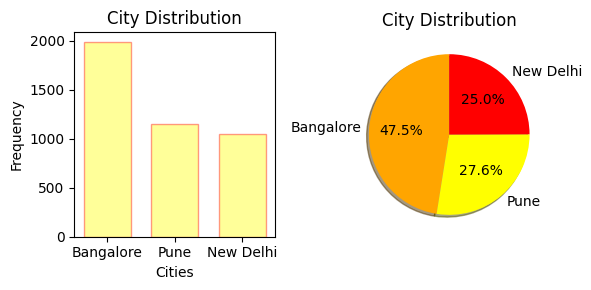

In [ ]:
city_counts = X['City'].value_counts()

city_counts = X["City"].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))

ax1.bar(city_counts.index, city_counts.values, width=0.7, color='yellow', alpha=0.4, edgecolor='red')
ax1.set_title("City Distribution")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Frequency")

# Grafico a torta per la colonna City
ax2.pie(city_counts.values, labels=city_counts.index, autopct='%1.1f%%', shadow=True, startangle=90, radius=1,colors=['orange', 'yellow', 'red',])
ax2.set_title("City Distribution")

plt.tight_layout()
plt.show()

Then we define the pipeline to deal with the City column:
- For the *step of imputation* we use **SimpleImputer**, with strategy **most_frequent**. This is a technique for imputing missing values, or better, to replace missing values with the most frequent value of the column.
- For the *step of data transformation* we use the **OneHotEncoder**, to convert categorical datas into a set of numerical features (0s and 1s). We use also some paramters: *categories='auto'*, to automatically infer the categories based on the unique values in the input data; *drop='first'*, to drop the first category to prevent collinearity; *handle_unknown='ignore'*, to ignore unknown categories, so categories that were not seen in the training data.

In [ ]:
pipeline_OHE = Pipeline([
    ("1", SimpleImputer(strategy='most_frequent')),
    ("2", OneHotEncoder(categories='auto',drop='first',handle_unknown='ignore'))
#we set categories automatically
#we ignore unknown categories
#we avoid collinearity using the par drop='first' (remove the first category to reduce the number of features)
], verbose = 0)

pipeline_OHE

Pipeline(steps=[('1', SimpleImputer(strategy='most_frequent')),
                ('2', OneHotEncoder(drop='first', handle_unknown='ignore'))],
         verbose=0)

> Remaining features

For the other features, since they have not missing values, we only have to apply the step of data transformation.

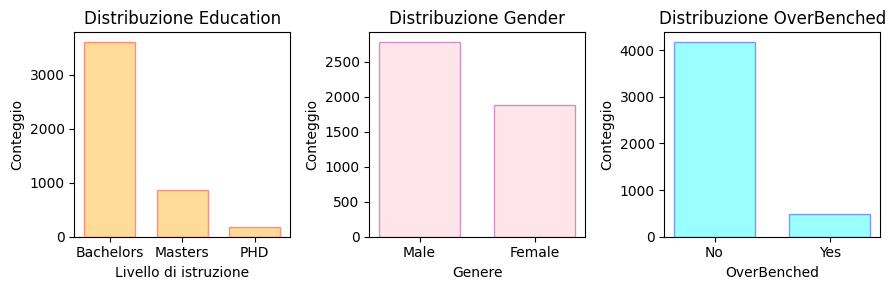

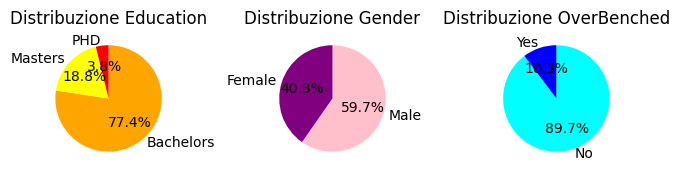

In [ ]:
education_counts = X["Education"].value_counts()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,3))
ax1.bar(education_counts.index, education_counts.values, width=0.7, color='orange', alpha=0.4, edgecolor='red')
ax1.set_title("Distribuzione Education")
ax1.set_xlabel("Livello di istruzione")
ax1.set_ylabel("Conteggio")

# Distribuzione della colonna Gender
gender_counts = X["Gender"].value_counts()

ax2.bar(gender_counts.index, gender_counts.values, width=0.7, color='pink', alpha=0.4, edgecolor='purple')
ax2.set_title("Distribuzione Gender")
ax2.set_xlabel("Genere")
ax2.set_ylabel("Conteggio")

# Distribuzione della colonna OverBenched
overbenched_counts = X["EverBenched"].value_counts()

ax3.bar(overbenched_counts.index, overbenched_counts.values, width=0.7, color='cyan', alpha=0.4, edgecolor='blue')
ax3.set_title("Distribuzione OverBenched")
ax3.set_xlabel("OverBenched")
ax3.set_ylabel("Conteggio")

plt.tight_layout()
plt.show()

 

# Distribuzione della colonna Education
education_counts = X["Education"].value_counts()

plt.subplot(1, 3, 1)
plt.pie(education_counts.values, labels=education_counts.index, autopct='%1.1f%%',
        colors=['orange', 'yellow', 'red',], startangle=90, counterclock=False, radius=1)
plt.title("Distribuzione Education")

# Distribuzione della colonna Gender
gender_counts = X["Gender"].value_counts()

plt.subplot(1, 3, 2)
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
        colors=['pink', 'purple'], startangle=90, counterclock=False, radius=1)
plt.title("Distribuzione Gender")

# Distribuzione della colonna OverBenched
overbenched_counts = X["EverBenched"].value_counts()

plt.subplot(1, 3, 3)
plt.pie(overbenched_counts.values, labels=overbenched_counts.index, autopct='%1.1f%%',
        colors=['cyan', 'blue'], startangle=90, counterclock=False, radius=1)
plt.title("Distribuzione OverBenched")

plt.tight_layout()
plt.show()

For the categorical features *Gender and OverBenched*, I will use the pipeline defined before, with **OneHotEncoder**, even if it has the *SimpleImputer* with strategy most frequent, because this imputer has effect only on missing values.

Instead, for the categorical feature *Education*, I will use the **Ordinal Encorder** in the column transformer that I define below. This because the order is relevant for the classes in this feature.

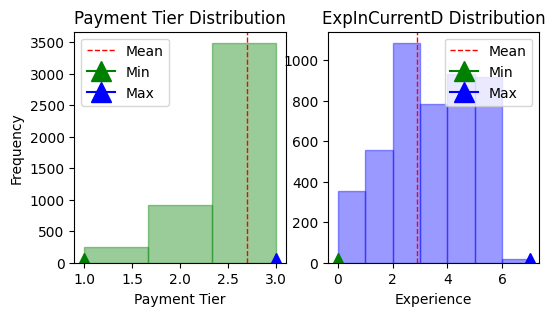

In [ ]:
pt = X["PaymentTier"]
pt = pt.dropna()

mean_pt = np.mean(pt)
min_value_pt = np.min(pt)
max_value_pt = np.max(pt)

ecd = X["ExperienceInCurrentDomain"]
ecd = ecd.dropna()

mean_ecd = np.mean(ecd)
min_value_ecd = np.min(ecd)
max_value_ecd = np.max(ecd)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

# Creare il histogram
ax1.hist(pt, bins=3, color='green', alpha=0.4, edgecolor='green')

# Overlay la media, il massimo e il minimo come punti
ax1.axvline(mean_pt, color='red', linestyle='dashed', linewidth=1)
ax1.plot([min_value_pt], [0], marker='^', markersize=15, color='green')
ax1.plot([max_value_pt], [0], marker='^', markersize=15, color='blue')

# Aggiungere una legenda
ax1.legend(['Mean', 'Min', 'Max'])

#titoli
ax1.set_xlabel('Payment Tier')
ax1.set_ylabel('Frequency')
ax1.set_title('Payment Tier Distribution')



# Creare il histogram
ax2.hist(ecd, bins=7, color='blue', alpha=0.4, edgecolor='blue')

# Overlay la media, il massimo e il minimo come punti
ax2.axvline(mean_ecd, color='red', linestyle='dashed', linewidth=1)
ax2.plot([min_value_ecd], [0], marker='^', markersize=15, color='green')
ax2.plot([max_value_ecd], [0], marker='^', markersize=15, color='blue')

# Aggiungere una legenda
ax2.legend(['Mean', 'Min', 'Max'])

#titoli
ax2.set_xlabel('Experience')
ax2.set_title('ExpInCurrentD Distribution')

# Mostrare il plot
plt.show()

*PaymentTier and ExperienceInCurrentDomain* are 2 numerical features, for which we apply a scaler called **MinMaxScaler**.
Is a technique used to scale numerical features to a specified range, that is of value between 0 and 1, based on the minimum and maximum values in that feature.
We use this scaler in the column transformer below.

### Column Tranformer

![](ColumnTransformer.png)

A **ColumnTransformer** is a class in Scikit-learn that allows us *to apply the pipeline* defined before *on the different features* that we have, both numerical and categorical.

So a ColumnTransformer takes a list of transformers and a list of column names that specify which transformer to apply to which columns.

In [ ]:
X_ct = ColumnTransformer(
    transformers=[
        ('1', OrdinalEncoder(categories=[['Bachelors','Masters','PHD']]), ['Education']),
        ('2', pipeline_OHE, ["City", 'Gender', 'EverBenched']),
        ('3', pipeline_KNN, ["Age", 'JoiningYear']),
        ('4', MinMaxScaler(), ['PaymentTier', 'ExperienceInCurrentDomain']),
    ],
remainder='drop', #to remove/drop all the features not affected by the ColumnTransformer (but in this case all are subject to it)
verbose_feature_names_out=False, #this helps to visualize names then, since we visualize only the original name
sparse_threshold=0, #return dense matrix (so with 0s, instead of sparse matrix, where 0s are not keeped, in order to save memory): numpy array
n_jobs = -1, #to use all the processors in parallel, useful to make the transformation faster, especially with large dataset and a great number of transformations, but we have to be careful because of memory problems
verbose = 0
)

X_ct.fit(X) #ITo visualize the ct

ColumnTransformer(n_jobs=-1, sparse_threshold=0,
                  transformers=[('1',
                                 OrdinalEncoder(categories=[['Bachelors',
                                                             'Masters',
                                                             'PHD']]),
                                 ['Education']),
                                ('2',
                                 Pipeline(steps=[('1',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('2',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))],
                                          verbose=0),
                                 ['City', 'Gender', 'EverBenched']),
                                ('3',
                                 Pipeline(steps=[('1',
                                                  KNNImputer(n_neighbors=10)),
                                                 ('2', StandardScaler())],
                                          verbose=0),
                                 ['Age', 'JoiningYear']),
                                ('4', MinMaxScaler(),
                                 ['PaymentTier', 'ExperienceInCurrentDomain'])],
                  verbose=0, verbose_feature_names_out=False)

### Checking

> Visualize the dataframe without missing values

At this point we **check if we've made all correct**, by visualizing the dataset. It should be without any missing value.
We use a **different dataframe** to store our dataframe without missing values, since *we cannot fit and transform the whole dataframe*, but only the train set.
So what we made is only to check if there are any missing value.

The **fit_transform** method is used to fit each transformer to its respective columns in the input data and to apply the transformations.
The **get_feature_names_out** instead is used to display the different names of the features.

In [ ]:
X_transformed = pd.DataFrame(X_ct.fit_transform(X), columns=X_ct.get_feature_names_out())
X_transformed #to visualize the dataset

,Education,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes,Age,JoiningYear,PaymentTier,ExperienceInCurrentDomain
0,0.0,0.0,0.0,1.0,0.0,1.006320,1.096720,1.0,0.000000
1,0.0,0.0,1.0,0.0,0.0,-0.304875,-1.158176,0.0,0.428571
2,0.0,1.0,0.0,0.0,0.0,1.880451,-0.594452,1.0,0.285714
3,1.0,0.0,0.0,1.0,0.0,-0.523407,0.532996,1.0,0.714286
4,1.0,0.0,1.0,1.0,1.0,-1.179005,1.096720,1.0,0.285714
...,...,...,...,...,...,...,...,...,...
4648,0.0,0.0,0.0,0.0,0.0,-0.741940,-1.158176,1.0,0.571429
4649,1.0,0.0,1.0,1.0,0.0,1.661918,-1.158176,0.5,0.285714
4650,1.0,1.0,0.0,1.0,0.0,-0.523407,1.660444,1.0,0.714286
4651,0.0,0.0,0.0,1.0,1.0,0.132190,-1.721900,1.0,0.285714


> Check the application of OneHotEncoder

We can also check if we've correctly applied the OrdinalEncoder in the ColumnTransformer, by comparing the data that we have in the first 4 rows.

Since we have for the first 3 0 and the fourth 1, that correspond to Bachelors and Masters, we have checked that is all correct.

In [ ]:
X_transformed['Education'][:4]

0    0.0
1    0.0
2    0.0
3    1.0
Name: Education, dtype: float64

In [ ]:
X['Education'][:4]

0    Bachelors
1    Bachelors
2    Bachelors
3      Masters
Name: Education, dtype: object

## TRAINING AND TEST SETS

In this section we split the entire dataset into training and test sets, putting **80%** of the instances in the train set, and the remaining **20%** in the test set.

The training set is used to fit the model, while the testing set is used to evaluate the performance of the model on unseen data.

This process is made when we have a **supervised task**: the label class is given, and we have to predict the future instances

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify = y, random_state=33, shuffle=True)

The **random state** is a parameter used for the *reproducibility* of the model. 
Since I can use any intger number I want for it, I've decided to use the number 33 (my personal lucky number).

**Stratify** is a parameter used to keep the *same proportion of the data* for each class of the target column, in the train and test sets. I specify y as the column for the stratification, since it is the target column.
Here we use stratify because, as we can see below (value_counts and graph), the vector y is unbalanced between the 2 classes (0, 1), and we want to keep this same proportions also in the y_train and y_test sets.


In [ ]:
y.value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

In [ ]:
DeepnoteChart(dataframeP, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"sort":null,"type":"quantitative","field":"LeaveOrNot","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"LeaveOrNot","scale":{"type":"linear"},"aggregate":"count"},"color":{"sort":null,"type":"nominal","field":"LeaveOrNot","scale":{"scheme":"tableau10"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

The proof of the effect of stratify is given by the following code, in which we have approximately the same number for the percentage of positive classes and then negatives ones in both train and test sets.

In [ ]:
sum(y_train == 0)/len(y_train), sum(y_test == 0)/len(y_test)

(0.6560988715744224, 0.6562835660580022)

In [ ]:
print("Difference: " + str(abs((sum(y_train == 0)/len(y_train)) - (sum(y_test == 0)/len(y_test)))))
#If this number is very low, it means that we have the same proportions

Difference: 0.0001846944835798281


For the positive classes is useless to repeat this, since to it belong the remaining instances.

At this point I visualize the **dimensions of the 2 sets** for the *dataframe X*.

In [ ]:
print('Shape of X_train: {}\nShape of X_test: {}'.format(X_train.shape, X_test.shape))

Shape of X_train: (3722, 8)
Shape of X_test: (931, 8)


## MODEL SELECTION
Model selection is the process of choosing the **best model** and **set of hyperparameters** to use for a given machine learning task, in terms of accuracy and efficiency, so the performance obtained by the model.
This process is called **nested-cross validation**.
The goal of model selection is to find the model that *best generalizes to unseen data*, while also being *computationally efficient and easy to interpret*.

### IMBPipeline

> We start by defining an IMBPipeline object, which works like a pipeline, but is specific to deal with imbalance dataset, like the one we have, providing additional functionalities.

In this case the pipeline has **4 different steps**:
- *Transformer step:* we apply the ColumnTransformer defined before
- *Sampler step:* we define a sampler, used to address class imbalance
- *Dimensionality reduction step:* we define the dimensionality reduction technique used to reduce the dimensionality of the data, while preserving the most relevant information.
- *Classifier step:* we define the classifier algorithm, that will make the predictions or classifications.

In the following code we have decide the elements by random, they are not the one founded.

In [ ]:
model_pipeline = IMBPipeline(
    steps= [
    ('transformer', X_ct), #our column transformer
    ('sampler', SMOTE(random_state=33)), #our sampling algorithm
    ('dim_reduction', PCA(n_components=0.8)), #the 
    ('classifier', Perceptron(random_state=33))
])

Le't run *fit* method and *predict* to verify if we errors occur.

In [ ]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(n_jobs=-1, sparse_threshold=0,
                                   transformers=[('1',
                                                  OrdinalEncoder(categories=[['Bachelors',
                                                                              'Masters',
                                                                              'PHD']]),
                                                  ['Education']),
                                                 ('2',
                                                  Pipeline(steps=[('1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('2',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))],
                                                           verbose=0),
                                                  ['City', 'Gender',
                                                   'EverBenched']),
                                                 ('3',
                                                  Pipeline(steps=[('1',
                                                                   KNNImputer(n_neighbors=10)),
                                                                  ('2',
                                                                   StandardScaler())],
                                                           verbose=0),
                                                  ['Age', 'JoiningYear']),
                                                 ('4', MinMaxScaler(),
                                                  ['PaymentTier',
                                                   'ExperienceInCurrentDomain'])],
                                   verbose=0,
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTE(random_state=33)),
                ('dim_reduction', PCA(n_components=0.8)),
                ('classifier', Perceptron(random_state=33))])

In [ ]:
model_pipeline.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

As we see below, the performance with this pipeline configuration are very low.
So we have to perfmorm nested cross validation.

In [ ]:
f1_score(y_train, model_pipeline.predict(X_train))

0.5150336045277679

### Samplers

> A sampler is a preprocessing step, that is used to address class imbalance in the training data. 

A sampler in fact is used to **resample the data** in order to **balance the class distribution**, so to *increase the performances.*

There are **two** main types of **sampling techniques** used in machine learning: 
- *under-sampling:* reduce the number of samples in the majority class, by selecting randomly a subset of samples, to match the number of samples in the minority class.
- *over-sampling:* increase the number of samples in the minority class, to match the number of samples in the majority class.

There are different **types of samplers** in scikit-learn and other machine learning libraries, including:
- *SMOTE (Synthetic Minority Over-sampling Technique):* technique for over-sampling the minority class in imbalanced datasets. It generates synthetic samples for the minority class from existing k samples.

- *RandomUnderSampler:* technique for under-sampling the majority class in imbalanced datasets. It randomly selects a subset of samples from the majority class and get rid off them to match the number of samples in the minority class. 

- *RandomOverSampler:* technique for over-sampling the minority class in imbalanced datasets. It randomly duplicates samples in the minority class, until the number of samples in both classes is equal. 

- *TomekLinks:* technique for under-sampling the majority class in imbalanced datasets. Identify pairs of samples from different classes, closest to each other in the feature space. Then the majority class samples in each pair are then removed.

We start by defining the list of all this sampler, with different configurations, that will be compared in nested cross validation.

In [ ]:
# Define a list of different sampler configurations to test
sampler_configurations = [
    # no sampling strategy
    {
        'sampler': [None]
    },
    # use SMOTE with different percentages of synthetic samples to generate
    {
        'sampler': [SMOTE(n_jobs=-1, random_state=33)],
        'sampler__sampling_strategy': ['minority', 0.9, 0.8, 0.7]
    },
    # use RandomOverSampler with different percentages of synthetic samples to generate
    {
        'sampler': [RandomOverSampler(random_state=33)],
        'sampler__sampling_strategy': ['minority', 0.9, 0.8, 0.7]
    },
    # use RandomUnderSampler with different percentages of samples to keep from majority class
    {
        'sampler': [RandomUnderSampler(random_state=33)],
        'sampler__sampling_strategy': ['majority', 0.9, 0.8, 0.7]
    },
    # use TomekLinks for undersampling
    {
        'sampler': [TomekLinks()],
        'sampler__n_jobs': [-1]
    }
]

### Dimensionality reduction

> A dimensionality reduction technique is a preprocessing step used to reduce the number of features

Dimensionality reduction is a technique used to **remove the features** in a dataset, especially an high-dimensional one, that are less informative.
This is done because we improve the performance and the interpretability, reducing overfitting and the computational complexity.
But it can also lead to loss of important information, decreasing the accuracy of the model.

There are **two main types** of dimensionality reduction: 
- *feature selection*: select a subset of features to use, based on some criteria
- *feature extraction*: create new features that are a combination of the most important information in the original ones.

There are different types of dimensionality reduction techniques, such as:
- *PCA (Principal Component Analysis):* technique for feature extraction. The algorithm selects a smaller number of features than the original dataset, a linear combination of features, to get the maximum amount of variance in the data and then projecting the data onto these new features. We obtain principal components, used as input features for the model. PCA is very useful with high-dimensional data, as it reduce the number of features without significantly loose information.

- *LDA (Linear Discriminant Analysis):* technique for feature extraction. The algorithm find the linear combinations of features that best separate the classes in the data, so which maximizes the between-class variance and minimizes the within-class variance. The resulting projections are used as input features. LDA is very useful when we want to separate the classes in the data, that are well-defined.

- *SFS (Sequential Feature Selection):* technique for feature selection. Starting with a subset of original features, the algorithm evaluates the model performance with each feature added or removed. The feature subset that yields the best performance is then selected. Repeat the process until we get a desired number of features. SFS is very useful when we want to identify a small subset of relevant features.

We define, as in samples, a list of all this dimensionality reduction techniques, with different configurations.

In [ ]:
dim_reduction_configurations = [
    {
        'dim_reduction': [None]  # no dimensionality reduction
    },
    {
        'dim_reduction': [PCA(random_state=33)],  # PCA with random seed
        'dim_reduction__n_components': [0.5, 0.6, 0.7, 0.8, 0.9]  # percentages of variance explained by principal components
    },
    {
        'dim_reduction': [LDA()]  # Linear Discriminant Analysis (we don't specify the number of componens since LDA determine them automatically)
    },
    {
        'dim_reduction': [SFS(estimator=Perceptron())],  # Sequential Feature Selection with Perceptron estimator
        'dim_reduction__estimator': [  # estimator options for SFS
            Perceptron(eta0=0.1, class_weight='balanced', n_jobs=-1, random_state=33),  # Perceptron with specific hyperparameters
            LogisticRegression(C=1, solver='liblinear', class_weight='balanced', n_jobs=-1)  # Logistic Regression with specific hyperparameters
        ],
        'dim_reduction__scoring': ['f1'],  # target score for SFS
        'dim_reduction__k_features': [2, 5, 7],  # number of features that the algorithm should select
        'dim_reduction__n_jobs': [-1]  # number of CPU cores we want to use for parallel processing
    }
]

### Classifiers

> A classifier is a preprocessing step used to classify the data

A classifier is a model that takes as input the data and predicts a target variable, so it's able to **make predictions or decisions about new, unseen data** based on patterns learned from training data. 

In **binary classification**, the output is interpreted as a *probability* that a given instance belongs to one of the two classes.

There are many **different types of classifiers**, including:
- *Perceptron:* linear algorithm used for classification, which classifies the data by finding an hyperplane that separates the data points.
- *Logistic Regression:* linear algorithm used for classification, which finds a decision boundary, by modelling the probabilities of the data points belonging to each class.
- *KNN (K-Nearest Neighbors):* non-parametric algorithm, which finds the K-nearest neighbors of a data point and then assigns a class based on the majority of the class labels of the neighbors.
- *Random Forest:* ensemble algorithm that combines the predictions of multiple decision trees to form a stronger model. The final classification is decided on the majority vote of the decision trees.
- *Gradient Boosting Classifier:* ensemble algorithm that combines multiple decision trees, trying to correct the errors of the previous trees. The classification is decided on the weighted sum of the decision trees.
- *Decision Tree:* non-parametric algorithm that partitions the feature space recursively into smaller regions based on the input features, creating decision regions with the same label.
- *Voting Classifier:* ensemble algorithm that combines multiple classifiers to make a final prediction, by either taking the majority vote (hard voting) or by taking a weighted average (soft voting).
- *Bagging Classifier:* ensemble algorithm that combines multiple classifiers, trained on a different subset of the data points. The predictions of each classifier are then combined to make the final prediction by majority voting or by taking the average.
- *AdaBoost Classifier:* ensemble algorithm that trains a sequence of weak learners and combines their predictions to form a stronger model. More weight to misclassified samples is given, so that next weak learner can focus on them. The final prediction is the weighted sum of all weak learners predictions, the weights are learned by minimizing a loss function.
- *XGBoost Classifier:* ensemble algorithm that is an optimized version of Gradient Boosting algorithm. It trains a sequence of decision trees and combines their predictions to form a stronger model
- *XGBRF Classifier:* ensemble algorithm that is an hybrid of XGBoost and Random Forest algorithms. The decision trees as base learners but with boosting techniques likeXGBoost to improve accuracy.


In [ ]:
classifier_configurations = [
    {
        'classifier__eta0' : loguniform(0.001, 100), 
        'classifier': [Perceptron(random_state=33)],
        'classifier__class_weight' : [None, "balanced"],
        'classifier__max_iter': [1, 5, 10, 15, 20]
    },
    {
        'classifier': [LogisticRegression(solver='saga', random_state=33)],
        'classifier__C' : loguniform(0.001,100),
        'classifier__penalty': ['l1','l2'],
        'classifier__class_weight' : [None, 'balanced']
    },
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3,5,7,9]
    },
    {
        'classifier': [RandomForestClassifier(random_state=33)],
        'classifier__n_estimators': [10, 50, 100, 150, 200],
        'classifier__max_depth': [None, 2, 5, 10, 20],
        'classifier__class_weight': [None, 'balanced']
    },
    {
        'classifier' : [GradientBoostingClassifier(random_state=33)] ,
        'classifier__n_estimators' : [100, 500, 1000] , #number of trees in the forest
        'classifier__learning_rate': loguniform(0.001, 0.05) , #the step size
        'classifier__max_depth' : [None, 1, 2, 3] # maximum depth of the individual decision trees
    },
    {
        'classifier' : [DecisionTreeClassifier(random_state=33)] ,
        'classifier__criterion' : ['entropy'] , # function to measure the quality of a split
        'classifier__max_depth' : [None, 1, 2, 3] # maximum depth of the tree
    },
    {
        'classifier' : [VotingClassifier(estimators=[
            ('lr', LogisticRegression(
                C = 0.01 ,
                class_weight = 'balanced' ,
                solver = 'liblinear' ,
                n_jobs = -1 
            )),
            ('dt', DecisionTreeClassifier(
                criterion = 'entropy' ,
                max_depth = 3 ,
                random_state = 33 
            )),
            ('kn', KNeighborsClassifier(
                n_neighbors = 5 ,
                n_jobs = -1
            ))
        ])] ,
        'classifier__voting' : ['hard', 'soft'] ,
        'classifier__weights' : [1, 2, 3] ,
        'classifier__n_jobs' : [-1] 
    },
    {
        'classifier': [BaggingClassifier(random_state=33)],
        'classifier__base_estimator': [
            {
                'estimator': LogisticRegression(
                    C=0.01,
                    class_weight='balanced',
                    solver='liblinear',
                    n_jobs=-1
                )
            },
            {
                'estimator': DecisionTreeClassifier(
                    criterion='entropy',
                    max_depth=3,
                    random_state=33
                )
            },
            {
                'estimator': KNeighborsClassifier(
                    n_neighbors = 5,
                    n_jobs=-1
                )
            }
        ],
        'classifier__n_estimators': [10, 50, 100],
        'classifier__n_jobs': [-1]
    },
    {
        'classifier': [AdaBoostClassifier(random_state=33)],
        'classifier__base_estimator': [
            DecisionTreeClassifier(
                criterion='entropy', # function to measure the quality of a split
                max_depth=3, # maximum depth of the tree
                random_state=33 # the random state for similar outputs
            ),
            RandomForestClassifier(
                n_estimators=500, # number of trees in the forest
                max_depth=3, # maximum depth of each decision tree in the forest
                max_features=3, # number of features to consider when looking for the best split
                random_state=33, # the random state for similar outputs
                n_jobs=-1 # the number of CPU cores we want to use for parallel processing
            )
        ],
        'classifier__n_estimators': [10, 50, 100], # number of weak classifiers
        'classifier__learning_rate': uniform(0.1, 0.9) # we set the learning rate (similar to the eta)
    },
    {
        'classifier' : [XGBClassifier(random_state=33)] ,
        'classifier__n_estimators' : [100, 500, 1000] , # number of decision trees that are built in the model
        'classifier__learning_rate': loguniform(0.001, 0.05) , # step size
        'classifier__max_depth' : [None, 1, 2, 3] , # controls the maximum depth of a tree
        'classifier__n_jobs' : [-1] # the numberof CPU cores we want to use for parallel processing
    },
    {
        'classifier' : [XGBRFClassifier(random_state=33)] ,
        'classifier__n_estimators' : [100, 500, 1000] , # numberof trees in the forest
        'classifier__learning_rate' : loguniform(0.001, 0.05) , # step size
        'classifier__max_depth' : [None, 1, 2, 3] , # maximum depth of a tree
        'classifier__num_parallel_tree': [-1] , # Number of parallel trees constructed during each iteration
        'classifier__n_jobs' : [-1] # number of CPU cores we want to use for parallel processing
    }
]

### Nested-Cross Validation

> We start by defining all the possible configurations in a list called all_configurations

**This list contains all the possible configurations of the three components of the IMBPipeline**: a sampler, a dimensionality reduction technique, and a classifier. 

We start by generating all the *different combinations of configurations of the 3 components*, expressed as dictionaries, using itertools.product. We get tuples, made of these 3 dictionaries.
Then we convert these tuples into *single dictionaries* using intertools.chain and dict.
And at the end we store all these dictionaries into a *list*, called all_configurations

In [ ]:
all_configurations = [ dict(itertools.chain(*(e.items() for e in configuration))) 
                       for configuration in itertools.product(sampler_configurations,
                                                              dim_reduction_configurations,
                                                              classifier_configurations)]

We print the number of all the possible configurations of the IMBpipeline.

In [ ]:
print(f'Number of all possible configurations: {len(all_configurations)}')

Number of all possible configurations: 220


> We define the inner loop, for the hyperparamter optimizations, using RandomizedSearchCV

We define a **RandomizedSearchCV** object rs, to perform the randomized search with *5 different fold* over the set of hyperparameter configurations, in order to get the *best set of hyperparameters*.

The *model_pipeline* is the machine learning pipeline that is being optimized
The parameter *all_configurations* is the list of dictionaries defined before, with all the hyperparameters.
*n_iter* is set to the length of all_configurations, meaning that each hyperparameter configuration will be tried exactly once during the search. 
The performance metric used is the *F1 score*.

In [ ]:
rs = RandomizedSearchCV(
    model_pipeline,
    param_distributions=all_configurations,
    n_iter=len(all_configurations),
    n_jobs = - 1,
    cv = 5, 
    scoring='f1',
    verbose = 1
)

> We define the outer loop, to find the best model with the best set of hyperparameters, using cross_validate method. 

We perform cross-validation to evaluate the performance of the model found through hyperparameter tuning using the RandomizedSearchCV method.

The function returns a dictionary containing the various scores for each fold of the cross-validation and the best estimators found during the cross-validation.

In [ ]:
scores = cross_validate(
    rs , # the estimators we found
    X = X_train , # train set
    y = y_train , # target train set
    cv = 10, # cross validation number or method
    scoring = 'f1' , # target score
    return_estimator = True , # to get the best estimators
    error_score = 'raise' , # to display errors
    verbose = 3, # to display the output
    n_jobs = -1
)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] END ......................................., score=0.672 total time=46.8min
Fitting 5 folds for each of 220 candidates, totalling 1100 fits
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 46.8min remaining:    0.0s
[CV] END ......................................., score=0.769 total time=67.0min
Fitting 5 folds for each of 220 candidates, totalling 1100 fits
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed: 113.9min remaining:    0.0s
[CV] END ......................................., score=0.775 total time=43.4min
Fitting 5 folds for each of 220 candidates, totalling 1100 fits
[CV] END ......................................., score=0.724 total time=49.7min
Fitting 5 folds for each of 220 candidates, totalling 1100 fits
[CV] END ......................................., score=0.735 total time=42.2min
Fitting 5 folds for each of 22

We can now display all the different **estimators with the most 10 best configurations** and their **score on the train and test set**, according to *F1 score*.
Is also returned the **delta* between these 2 values, in order to verify the estimator with *less overfitting or underfitting.*

In [ ]:
best_f1_score = 0 # we set a zero value for the best f1_score
for index, estimator in enumerate(scores['estimator']):
    pred_train = estimator.best_estimator_.fit(X_train, y_train)
    pred_train = estimator.best_estimator_.predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    delta = abs(f1_train - f1_test)
    print(f'Sampler :', estimator.best_estimator_.get_params()['sampler'])
    print(f'Dim. reduction :', estimator.best_estimator_.get_params()['dim_reduction'])
    print(f'Classifier :', estimator.best_estimator_.get_params()['classifier'], estimator.best_estimator_.get_params()['classifier'].get_params())
    print(f'f1 score :', scores['test_score'][index])
    print(f'f1 score (train set) : {f1_train}')
    print(f'f1 score (test set) : {f1_test}')
    print(f'Delta train-test : {delta}')
    print(f'-'*50)

Sampler : SMOTE(n_jobs=-1, random_state=33, sampling_strategy=0.8)
Dim. reduction : None
Classifier : RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=33) {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 33, 'verbose': 0, 'warm_start': False}
f1 score : 0.6720647773279352
f1 score (train set) : 0.7281029472810295
f1 score (test set) : 0.7109634551495015
Delta train-test : 0.01713949213152799
--------------------------------------------------
Sampler : RandomOverSampler(random_state=33, sampling_strategy=0.9)
Dim. reduction : None
Classifier : XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                

But we can also visualize only the **different performances** obtained by these 15 best estimators, because these are the *most relevant information* to choose the **best estimator** among these 15 ones.

In [ ]:
for estimator in scores['estimator']:
    pred_train = estimator.best_estimator_.fit(X_train, y_train)
    pred_train = estimator.best_estimator_.predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    difference = abs(f1_train - f1_test)
    print(f'F1 on training set: {f1_train}')
    print(f'F1 on test set: {f1_test}')
    print(f'Difference between test and train: {difference}')
    print(f'-'*20)

F1 on training set: 0.7281029472810295
F1 on test set: 0.7109634551495015
Difference between test and train: 0.01713949213152799
--------------------
F1 on training set: 0.7637595258255715
F1 on test set: 0.7290969899665553
Difference between test and train: 0.03466253585901624
--------------------
F1 on training set: 0.8171206225680934
F1 on test set: 0.7180385288966725
Difference between test and train: 0.09908209367142085
--------------------
F1 on training set: 0.7754401030485186
F1 on test set: 0.7167235494880545
Difference between test and train: 0.058716553560464124
--------------------
F1 on training set: 0.8245687841817417
F1 on test set: 0.7135678391959799
Difference between test and train: 0.11100094498576185
--------------------
F1 on training set: 0.7661393758016246
F1 on test set: 0.7177700348432055
Difference between test and train: 0.04836934095841916
--------------------
F1 on training set: 0.8076091655858192
F1 on test set: 0.7197231833910035
Difference between test a

> Estimator choice by the best delta

The estimator with the **smallest difference between the F1 score on the training set and the F1 score on the test set** can be considered the best estimator, becuase it lead to *less overfitting or underfitting* of the data and is able to generalize well to new, unseen data.

IIn this case the best delta is 0.017692693074821797, given by **SMOTE and XGBRFClassifier**.
It's not used a *dimensionality reduction technique*, since we have only few of features, so they are all important for the prediction, and if we reduce them we have a loss in accuracy.

## REFINEMENT OF THE BEST MODEL

### IMBPipeline

> Define the IMBPipeline with the steps setted according to the best estimator founded before

We define the **4 different steps** of the IMBPipeline as:
- *transf:* the initial ColumnTransformer
- *sample:* the SMOTE algorithm obtained before
- *dim_reduction:* None, since from the previous result of the best estimator we get that we don't need a dim_reduction technique
- *classifier:* the XGBRFClassifier, that we obtained before.

In [ ]:
best_model_pipeline = IMBPipeline([
    ('trans', X_ct),
    ('sample', SMOTE(n_jobs=-1, random_state=33)),
    ('dim_reduction', None),
    ('classifier', XGBRFClassifier(random_state=33))
])

### Classifier's hyperparameters optimization

> We have to find the best configuration for the classifier

We set *different values*, so different scales, for the **hyperparameters of the XGBRFClassifier**, in order to *improve more the performance of the estimator*.
These values are setted considering the values obtained before for XGBRFClassifier, when we get it as the best estimator.

In [ ]:
params_best = {
    'classifier__n_estimators' : [700, 900, 1000, 1300, 1400, 1500] , # number of trees in the forest
    'classifier__learning_rate' : loguniform(0.0001, 0.001) , # step size
    'classifier__max_depth' : [None] , # maximum depth of a tree
    'classifier__num_parallel_tree': [-1] , # Number of parallel trees constructed during each iteration
    'classifier__n_jobs' : [-1] # number of CPU cores we want to use for parallel processing
}

To search and obtain the *best hyperparameters* for the classifier, we have to run as before the **RandomizedSearchCV.**

In [ ]:
rs_best = RandomizedSearchCV(
    estimator = best_model_pipeline,
    param_distributions = params_best,
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3),
    n_iter = 20,
    scoring='f1',
    random_state=33,
    n_jobs=-1,
    error_score = 'raise',
    verbose=1,
)

In [ ]:
rs_best.fit(X_train, y_train)

Fitting 15 folds for each of 20 candidates, totalling 300 fits


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
                   error_score='raise',
                   estimator=Pipeline(steps=[('trans',
                                              ColumnTransformer(n_jobs=-1,
                                                                sparse_threshold=0,
                                                                transformers=[('1',
                                                                               OrdinalEncoder(categories=[['Bachelors',
                                                                                                           'Masters',
                                                                                                           'PHD']]),
                                                                               ['Education']),
                                                                              ('2',
                                                                               Pipeline(steps=[('1',
                                                                                                SimpleImputer(strategy='most_frequent')),...
                                                              reg_alpha=None, ...))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'classifier__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f816c149400>,
                                        'classifier__max_depth': [None],
                                        'classifier__n_estimators': [700, 1000,
                                                                     1300, 1400,
                                                                     1500],
                                        'classifier__n_jobs': [-1],
                                        'classifier__num_parallel_tree': [-1]},
                   random_state=33, scoring='f1', verbose=1)

The **best estimator obtained** is the following.
We can *click on* its name to *visualize the parameters choosen*.

In [ ]:
rs_best.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(n_jobs=-1, sparse_threshold=0,
                                   transformers=[('1',
                                                  OrdinalEncoder(categories=[['Bachelors',
                                                                              'Masters',
                                                                              'PHD']]),
                                                  ['Education']),
                                                 ('2',
                                                  Pipeline(steps=[('1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('2',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))],
                                                           verbose=0),
                                                  ['City', 'Gender',
                                                   'EverBenched']),
                                                 ('3',
                                                  Pipeline(s...
                                 interaction_constraints=None,
                                 learning_rate=0.0004669615727515129,
                                 max_bin=None, max_cat_threshold=None,
                                 max_cat_to_onehot=None, max_delta_step=None,
                                 max_depth=None, max_leaves=None,
                                 min_child_weight=None, missing=nan,
                                 monotone_constraints=None, n_estimators=1000,
                                 n_jobs=-1, num_parallel_tree=-1,
                                 objective='binary:logistic', predictor=None,
                                 random_state=33, ...))])

### Performances

> Performances with different metrics

We want to get the **different performances** with this estimator on our dataset.
We use as metrics:
- *f1:* harmonic mean and balance of precision and recall. It's a useful metric when the classes are imbalanced
- *recall:* measures the percentage of actual positive cases, correctly identified by the model. 
- *accuracy:* measures the proportion of true positive and true negative predictions to the total number of predictions made. However, it can be misleading in imbalanced datasets.
- *precision:* measures the proportion of true positives predictions to the total number of predicted positives.

In [ ]:
f1 = f1_score(y_test, rs_best.best_estimator_.predict(X_test))
f1

0.733446519524618

In [ ]:
recall = recall_score(y_test, rs_best.best_estimator_.predict(X_test))
recall

0.675

In [ ]:
accuracy = accuracy_score(y_test, rs_best.best_estimator_.predict(X_test))
accuracy


0.8313641245972073

In [ ]:
precision = precision_score(y_test, rs_best.best_estimator_.predict(X_test))
precision

0.8029739776951673

We **plot** the *different scores* getted from the different performance metrics.

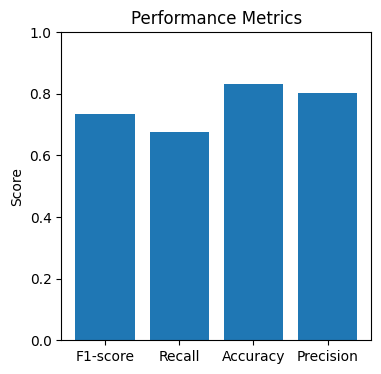

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.bar(['F1-score', 'Recall', 'Accuracy', 'Precision'], [f1, recall, accuracy, precision])
ax.set_ylim([0, 1])
ax.set_title('Performance Metrics')
ax.set_ylabel('Score')
plt.show()


We now **store the best estimator** inside the variable cls.
This estimator is the one that achieved the best scores in the cv process, using the best_estimator_ attribute of RandomizedSearchCV.

In [ ]:
cls = rs_best.best_estimator_

### Plots

> Learning curve

A **learning curve** is a *plot of the model's performance on the train and validation sets*, as a function of the size of the training set.
So it shows the relationship between the train set size and the model's performance, measured by the F1 score.

The purpose of it is to help **determine** if a model has **overfit, underfit, or is well-generalized**. 
- A *well-generalized model* have similar performance on the train and test sets
- An *overfit model* have high performance on the train set, but poor performance on the tes set set
- An *underfit model* will have poor performance on both datasets.

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator = cls , # the estimator to use
    X = X_train , # the train set
    y = y_train , # the target train set
    train_sizes = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # the train seizes list
    cv = 3 , # cross validation number or method
    scoring = 'f1' , # the target score is the f1
    shuffle = True , # shuffle the data before splitting
    random_state = 33 , # the random state for similar outputs
    n_jobs = -1 , # the number of CPU cores we want to use for parallel processing
    error_score = 'raise' , # to display errors
    verbose = 1 # to display the output
)


[learning_curve] Training set sizes: [  24  248  496  744  992 1240 1488 1736 1984 2232 2481]
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:   55.1s finished


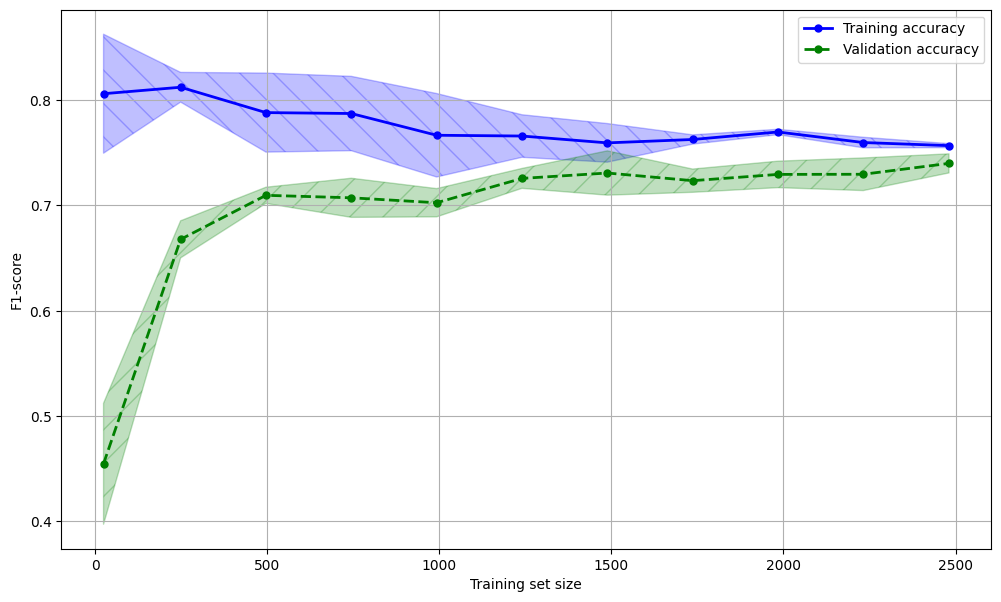

In [ ]:
train_mean = np.mean(train_scores , axis=1) # the mean of train f1 scores
train_std = np.std(train_scores , axis=1) # the standard deviatom of train f1 scores
test_mean = np.mean(test_scores , axis=1) # the mean of test f1 scores
test_std = np.std(test_scores , axis=1) # the standard deviatom of test f1 scores
f1_set_size_plot = plt.figure(figsize=(12, 7)).add_subplot()
f1_set_size_plot.plot(
train_sizes , # plot on x axe
train_mean , # plot on y axe
color = 'blue' , # marker color
linewidth = 2 , # line width
marker = '.' , # marker style
markersize = 10 , # marker dimension
label = 'Training accuracy' # marker name
)
f1_set_size_plot.fill_between(
train_sizes , # plot on x axe
train_mean + train_std , # plot on y axe
train_mean - train_std , # plot on y axe
alpha = 0.25 , # fill transparency %
hatch = '\\' , # line fill
color = 'blue' # fill color
)
f1_set_size_plot.plot(
train_sizes , # plot on x axe
test_mean , # plot on y axe
color = 'green' , # marker color
linestyle = '--' , # line style
linewidth = 2 , # line width
marker = '.' , # marker style
markersize = 10 , # marker dimension
label = 'Validation accuracy' # marker name
)
f1_set_size_plot.fill_between(
train_sizes , # plot on x axe
test_mean + test_std , # plot on y axe
test_mean - test_std , # plot on y axe
alpha = 0.25 , # fill transparency %
hatch = '/' , # line fill
color = 'green' # fill color
)
f1_set_size_plot.grid() # show the grid
f1_set_size_plot.set_xlabel('Training set size') # x axe label
f1_set_size_plot.set_ylabel('F1-score') # y axe label
f1_set_size_plot.legend(loc='upper right',) # legend position
f1_set_size_plot.set_autoscale_on(True) # autoscaling the plot

From the graph we notice that our model have **some overfitting**, since the performance on the train set are better than the one of the validation set, **but is relatively a good model**.

> Validation curve

A **validation curve** is a plot that shows how the *model's performance changes* with different values of its hyperparameters.
It is useful for hyperparameter tuning, as it helps in identifying the optimal hyperparameters for a model.

The x-axis shows the different values of the hyperparameter of the model.
The y-axis shows the performance metric and the different scores; here is F1. 

We have 2 different lines:
- one for the training score (blue): shows the performance of the model with training data.
- one for the validation score (green): shows the performance of the model with validation data.

Here we display the **n_estimators** hyperparameter.

In [ ]:
range_C = [200, 600, 1000, 1400, 1800, 2000]
train_scores, test_scores = validation_curve(
    estimator = cls , # the estimator to use
    X = X_train , # the train set
    y = y_train , # the target train set
    param_range = range_C , # the parameter range
    param_name = 'classifier__n_estimators' , # the parameter we use
    cv = 5, # cross validation number or method
    scoring = 'f1' , # the target score is the f1
    n_jobs = -1 , # the number of CPU cores we want to use for parallel processing
    error_score = 'raise' , # to display errors
    verbose = 1 # to display the output
)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.2min finished


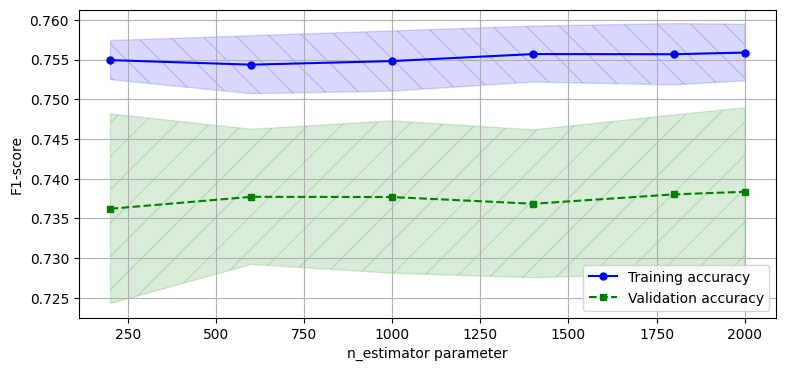

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(9,4))
axB = fig.add_subplot()
axB.plot(range_C, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

axB.fill_between(range_C,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, 
                 color='blue',
                 hatch='\\')

axB.plot(range_C, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

axB.fill_between(range_C,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, 
                 color='green',
                 hatch = "/")

axB.grid()
axB.set_xlabel('n_estimator parameter')
axB.set_ylabel('F1-score')
axB.legend(loc='lower right')
axB.set_autoscale_on(True)

We notice that, even if we use very different values for the parameters n_estimator, the model's performances are quite stable.

Let's check the same also for the other hyperparameter which we inspected with randomized CV: **learning_rate.**

In [ ]:
range_C_lr = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores, test_scores = validation_curve(
    estimator = cls , # the estimator to use
    X = X_train , # the train set
    y = y_train , # the target train set
    param_range = range_C , # the parameter range
    param_name = 'classifier__learning_rate' , # the parameter we use
    cv = 5, # cross validation number or method
    scoring = 'f1' , # the target score is the f1
    n_jobs = -1 , # the number of CPU cores we want to use for parallel processing
    error_score = 'raise' , # to display errors
    verbose = 1 # to display the output
)

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.5min finished


(0.0001, 1000)

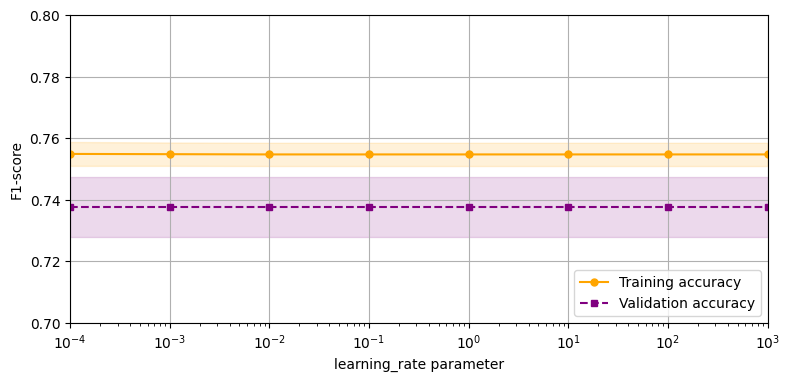

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(9,4))
ax = fig.add_subplot()
ax.plot(range_C, train_mean,
         color='orange', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(range_C,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='orange')

ax.plot(range_C, test_mean,
         color='purple', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(range_C,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='purple')

ax.grid()
ax.set_xlabel('learning_rate parameter')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.7, 0.8])
ax.set_xscale('log')
ax.set_xlim([0.0001,1000])

As with the other hyperparameter, we notice that we don't get different performances with different values of it.

> Confusion matrix

A **confusion matrix** is a table used to evaluate the performance of a model, by comparing the actual and predicted classes for a set of data. 

For binary classification problems, the confusion matrix has two rows and two columns:
- The *rows* correspond to the actual class labels.
- The *columns* correspond to the predicted class labels.

The four cells in the matrix represent:
- *True Positives (TP):* instances that were correctly classified as positive
- *False Positives (FP):* instances that were incorrectly classified as positive
- *True Negatives (TN):* instances that were correctly classified as negative
- *False Negatives (FN):* instances that were incorrectly classified as negative

The *diagonal* of the table (from top left to bottom right) represents the instances that were classified correctly, while the *off-diagonal* values represent the instances that were misclassified.

In [ ]:
y_predicted = cls.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

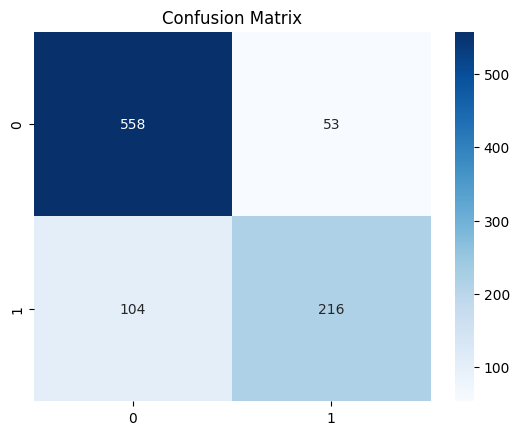

In [ ]:
confusion_matrix_plot = sns.heatmap(
data = confusion_matrix(y_test, y_predicted) , # the data we want to plot
annot = True , # specify whether to annotate the cells of the heatmap with the actual values of the data
cmap = 'Blues' , # specifies the colormap to use for the plot
fmt = 'd' # specify the format of the annotations in the cells
)
confusion_matrix_plot.set_title('Confusion Matrix') # display the title of the plot

We have many TP values (558) and also many TN values (216), but also some misclassified ones, for a total of 173. So the performance of the model, but we can still improve it, by additional training.

> Roc Cruve

**A Receiver Operating Characteristic (ROC) curve** is a plot of the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

- *True positive rate (TPR):* ratio of correctly identified positive samples to the total number of positive samples.
- *False positive rate (FPR):* ratio of incorrectly identified negative samples to the total number of negative samples.

The *diagonal dashed line* represents the performance of a random classifier, so a classifier which makes random guesses about the class label. 
The points above this line indicate better-than-random performance, instead the points on the diagonal line indicate that the classifier is no better than random guessing (TPR and FPR values are similar)

So the **goal** is to obtain a *ROC curve that is as far as possible from the diagonal line*, indicating that the classifier have great performances.

In [ ]:
y_predicted_probability = cls.predict_proba(X_test)

We define the false positive rate, the true positive rate and the tresholds

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_probability[:, 1])

**y_predicted_probability[:,1]** is an array that contains the *predicted probabilities for the positive class* of a binary classification problem.
In fact the roc_curve function requires as input these probabilities.

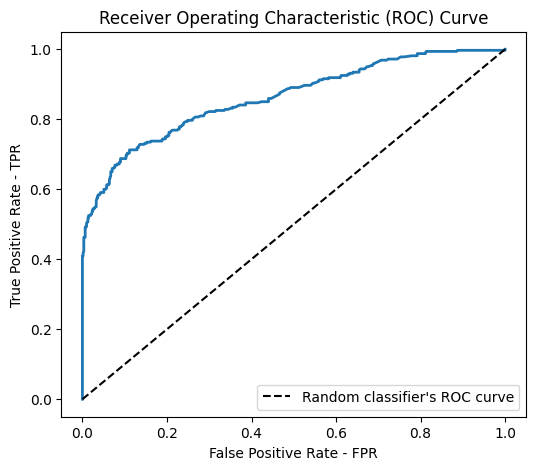

In [ ]:
#We plot the graph of the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random classifier's ROC curve")
plt.xlabel('False Positive Rate - FPR')
plt.ylabel('True Positive Rate - TPR')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

As we can see the **ROC curve is quite distant from the diagonal dashed line**, so the model has *great performance.*

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0e37b30-3e33-4ad2-8eb4-195a5b8ea4ba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>